# Analisis de varianza
Un estudio realizado por investigadores de Pennsylvania State University arroja los datos contenidos en el conjunto de datos.
+ El conjunto de datos incluye los pesos (en kilogramos) de álamos que recibieron distintos tratamientos en terrenos diferentes.
#### ANOVA 1 solo factor
+ Sólo consideraremos los pesos del año 1 en el terreno 1, el cual tiene un suelo fértil y húmedo, y se localiza cerca de un arroyo. 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f
import numpy as np

# Especifica la ruta del archivo Excel
archivo = '../../data/AlamosWeights.xlsx'  # Cambia esto por la ruta real de tu archivo

# Carga el archivo Excel en un DataFrame
df = pd.read_excel(archivo, sheet_name='PesoAlamos')  # Cambia 'Hoja1' según el nombre de tu hoja
df1=  df[(df.Años == 1) & (df.Lugar =='Fertil-Húmedo')]
df1


,Años,Lugar,Sin tratamiento,Fertilizante,Riego,Fertilizante y riego
0,1,Fertil-Húmedo,0.15,1.34,0.23,2.03
1,1,Fertil-Húmedo,0.02,0.14,0.04,0.27
2,1,Fertil-Húmedo,0.16,0.02,0.34,0.92
3,1,Fertil-Húmedo,0.22,0.08,0.05,2.38
4,1,Fertil-Húmedo,0.37,0.08,0.16,1.07


#### Exploración de datos
Con la intención de explorar los datos para investigar el centro, la variación, la distribución, los valores extremos y los patrones de cambio a través del tiempo (CVDVT), 
+ comenzamos calculando los estadísticos muestrales.

In [67]:
df1.describe()

,Años,Sin tratamiento,Fertilizante,Riego,Fertilizante y riego
count,5.0,5.000000,5.000000,5.000000,5.000000
mean,1.0,0.184000,0.332000,0.164000,1.334000
std,0.0,0.127004,0.565084,0.126214,0.859029
min,1.0,0.020000,0.020000,0.040000,0.270000
25%,1.0,0.150000,0.080000,0.050000,0.920000
50%,1.0,0.160000,0.080000,0.160000,1.070000
75%,1.0,0.220000,0.140000,0.230000,2.030000
max,1.0,0.370000,1.340000,0.340000,2.380000


+ Al examinar las medias muestrales, vemos que parecen variar mucho, desde 0.164 kg hasta 1.334 kg. 
+ Además, las desviaciones estándar de las muestras varían considerablemente, desde 0.126 kg hasta 0.859 kg. 

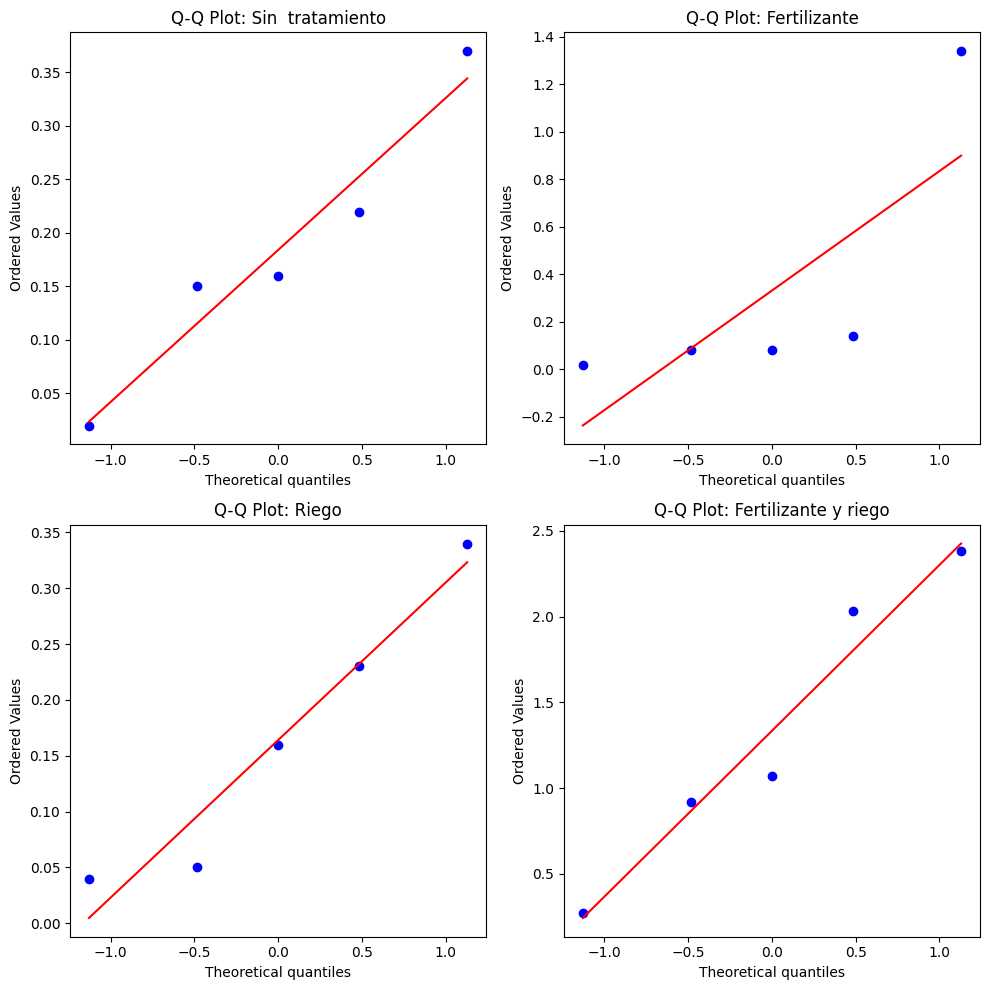

In [68]:
# Graficos de cada escenario
fig, axs = plt.subplots(2, 2, figsize=(10, 10)) # Crear subplots para las gráficas Q-Q
scene = df1.columns[2:]                         # A cada subplot lo llamaremos escenario

# Generar Q-Q plots
for i, col in enumerate(scene):
    ax = axs[i//2, i%2]
    stats.probplot(df1[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {col}')

# Ajustar el layout
plt.tight_layout()
plt.show()

+ Es difícil analizar las distribuciones porque cada muestra consiste únicamente en 5 valores, 
    + pero las gráficas cuantilares normales sugieren que tres de las muestras provienen de poblaciones con distribuciones aproximadamente normales. 
+ Sin embargo, el análisis de los pesos de los álamos que recibieron tratamiento con fertilizantes sugiere que el peso de 1.34 kg es un valor extremo 
    + cuando se compara con los otros pesos de los árboles fertilizados. 
+ Con un solo valor extremo, procederemos bajo el supuesto de que las muestras provienen de poblaciones con distribuciones aproximadamente normales.            
    + Podríamos realizar análisis adicionales posteriormente para determinar si el peso de 1.34 kg tiene un fuerte efecto en los resultados.
    + Pero por el momento asumimos que no hay un fuerte efecto en este caso.
+ Parece que las diferencias entre las medias muestrales indican que las muestras provienen de poblaciones con medias diferentes, 
    + pero en vez de considerar únicamente las medias muestrales, también debemos considerar
        + las cantidades de variación, 
        + los tamaños muestrales y 
        + la naturaleza de la distribución de las medias muestrales. 
+ Una forma de tomar en cuenta todos estos factores importantes consiste en realizar una prueba formal de hipótesis que los incluya de manera automática. 
+ Entonces sabremos si los distintos tratamientos tienen algún efecto.


#### ANOVA 
+ Probar si los distintos tratamientos tienen algún efecto significa probar que las cuatro muestras provienen de escenario significativamente diferentes.
+ Para probar la aseveración de que las cuatro muestras provienen de poblaciones con medias realmente diferentes, podemos realizar un análisis de varianza (ANOVA). 
+ Este método estadístico se usa para comparar las medias de más de dos grupos y verificar si existen diferencias significativas entre ellas.

In [69]:
# Realizar ANOVA
f_stat, p_value = stats.f_oneway(df1['Sin  tratamiento'], df1['Fertilizante'], df1['Riego'], df1['Fertilizante y riego'])

# Resultados
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')

# Evaluación del valor p
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Las medias de los tratamientos son significativamente diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que las medias de los tratamientos son diferentes.")

Estadístico F: 5.731352874755579
Valor p: 0.007348294418256392
Se rechaza la hipótesis nula. Las medias de los tratamientos son significativamente diferentes.


**Interpretación de los resultados**
+ Estadístico F: Para este ejemplo, el valor de F obtenido es 5.73.
+ Valor p: El valor p asociado es 0.007.

+ El valor p (0.007) es menor que el nivel de significancia 0.05, con lo que podemos rechazar la hipótesis nula. 
+ Esto significa que:
    +  existe evidencia suficiente para afirmar que al menos una de las medias de los tratamientos es significativamente diferente de las demás.

##### Visualización de los resultados

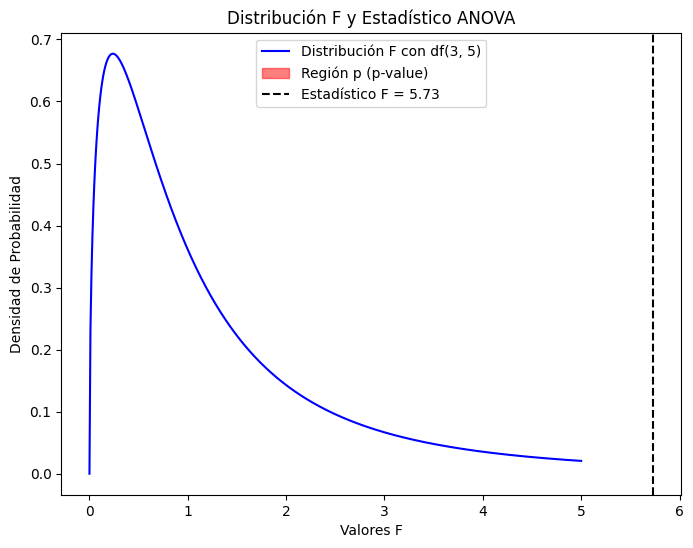

Estadístico F: 5.731352874755579
Valor p: 0.007348294418256392


In [70]:
# Grados de libertad (df)
df_between = len(scene) - 1   # Grupos - 1
df_within = len(df1)  # Total de muestras - grupos

# Crear un rango de valores F para la distribución
f_values = np.linspace(0, 5, 500)
f_dist = f.pdf(f_values, df_between, df_within)  # Distribución F

# Graficar la distribución F
plt.figure(figsize=(8, 6))
plt.plot(f_values, f_dist, 'b-', label=f'Distribución F con df({df_between}, {df_within})')

# Sombrear la región correspondiente al valor p (cola derecha)
plt.fill_between(f_values, 0, f_dist, where=(f_values >= f_stat), color='red', alpha=0.5, label=f'Región p (p-value)')

# Línea vertical para el estadístico F calculado
plt.axvline(f_stat, color='black', linestyle='--', label=f'Estadístico F = {f_stat:.2f}')

# Añadir títulos y leyenda
plt.title('Distribución F y Estadístico ANOVA')
plt.xlabel('Valores F')
plt.ylabel('Densidad de Probabilidad')
plt.legend(loc='best')

# Mostrar gráfico
plt.show()

# Mostrar resultados
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')


___________________________________________________________________________________________________________

#### ANOVA 2 factores - 1 año y dos terrenos.
+ El conjunto de datos incluye los pesos (en kilogramos) de álamos que recibieron distintos tratamientos en terrenos diferentes.
+ Ahora consideraremos los pesos del **año 1 y de los terrenos 1 y 2**, 
    + los cuales tienen un **suelos fértil y húmedo**, y **arenoso y seco**. 

In [71]:
df2=  df[(df.Años == 1)]
df2

,Años,Lugar,Sin tratamiento,Fertilizante,Riego,Fertilizante y riego
0,1,Fertil-Húmedo,0.15,1.34,0.23,2.03
1,1,Fertil-Húmedo,0.02,0.14,0.04,0.27
2,1,Fertil-Húmedo,0.16,0.02,0.34,0.92
3,1,Fertil-Húmedo,0.22,0.08,0.05,2.38
4,1,Fertil-Húmedo,0.37,0.08,0.16,1.07
5,1,Arenoso-Seco,0.60,1.16,0.65,0.22
6,1,Arenoso-Seco,1.11,0.93,0.08,2.13
7,1,Arenoso-Seco,0.07,0.30,0.62,2.33
8,1,Arenoso-Seco,0.07,0.59,0.01,1.74
9,1,Arenoso-Seco,0.44,0.17,0.03,0.12


#### Exploración de datos

Formato "long": Para realizar el análisis ANOVA con statsmodels, transformamos el DataFrame de formato ancho a formato largo con pd.melt(). 
+ En este formato, las variables de tratamiento (Sin tratamiento, Fertilizante, Riego, Fertilizante y riego) se agrupan en una columna llamada Tratamiento, 
    + y los valores correspondientes de peso en la columna Peso.

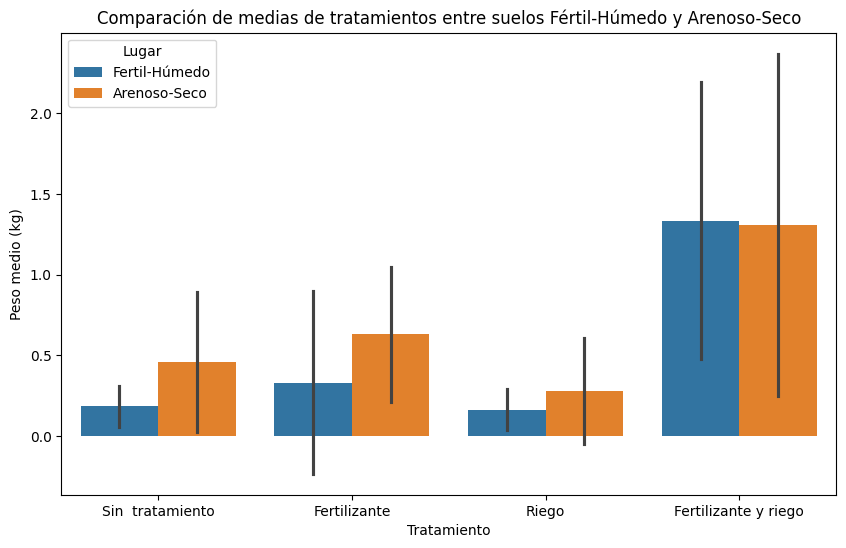

In [72]:
# Transformar los datos en formato "long" para graficar
df_long = df2.melt(id_vars=['Años', 'Lugar'], 
                  value_vars=['Sin  tratamiento', 'Fertilizante', 'Riego', 'Fertilizante y riego'], 
                  var_name='Tratamiento', value_name='Peso')

# Crear gráfico de barras con medias por tratamiento y lugar
plt.figure(figsize=(10, 6))
sns.barplot(x='Tratamiento', y='Peso', hue='Lugar', data=df_long, errorbar='sd')

# Añadir etiquetas y título
plt.title('Comparación de medias de tratamientos entre suelos Fértil-Húmedo y Arenoso-Seco')
plt.xlabel('Tratamiento')
plt.ylabel('Peso medio (kg)')
plt.legend(title='Lugar')

# Mostrar la gráfica
plt.show()


Modelo ANOVA de dos vías: Definimos el modelo ANOVA utilizando la fórmula:

+ C(Lugar): Efecto del lugar (Fertil-Húmedo y Arenoso-Seco).
+ C(Tratamiento): Efecto del tratamiento (Sin tratamiento, Fertilizante, Riego, Fertilizante y riego).
+ C(Lugar):C(Tratamiento): Interacción entre lugar y tratamiento.
+ Luego, realizamos la prueba ANOVA usando anova_lm().

In [73]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Definir el modelo ANOVA de dos vías
model = ols('Peso ~ C(Lugar) + C(Tratamiento) + C(Lugar):C(Tratamiento)', data=df_long).fit()

# Realizar la prueba ANOVA
anova_table = anova_lm(model, typ=2)
print(anova_table)


                           sum_sq    df         F    PR(>F)
C(Lugar)                  0.27225   1.0  0.812180  0.374209
C(Tratamiento)            7.54700   3.0  7.504776  0.000614
C(Lugar):C(Tratamiento)   0.17163   3.0  0.170670  0.915411
Residual                 10.72668  32.0       NaN       NaN


**Interpretación**
1. C(Lugar): El valor p (PR(>F)) es 0.37, lo cual es mayor que el nivel de significancia 0.05, lo que indica que no hay evidencia suficiente para afirmar que el lugar (Fertil-Húmedo o Arenoso-Seco) tenga un efecto significativo en los pesos de los álamos.

2. C(Tratamiento): El valor p es 0.0006, lo que es menor que 0.05, lo que significa que los diferentes tratamientos aplicados (Sin tratamiento, Fertilizante, Riego, Fertilizante y riego) sí tienen un efecto significativo en los pesos de los álamos.

3. Interacción (Lugar*Tratamiento): El valor p es 0.20, que es mayor que 0.05. Esto indica que no hay evidencia significativa de que la interacción entre el lugar y el tratamiento tenga un efecto sobre el peso de los álamos.

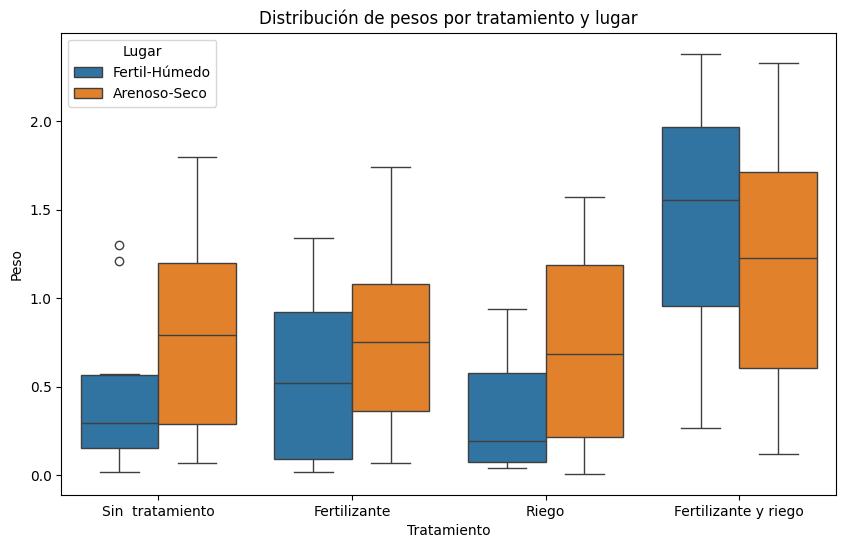

In [79]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tratamiento', y='Peso', hue='Lugar', data=df_long)
plt.title('Distribución de pesos por tratamiento y lugar')
plt.show()

**Conclusión**
1. Los diferentes tratamientos aplicados a los álamos tienen un impacto significativo en su crecimiento.
2. Sin embargo, el tipo de terreno (lugar) no parece influir significativamente en el peso de los álamos.
3. No se encontró una interacción significativa entre el lugar y el tratamiento, lo que sugiere que los efectos del tratamiento son consistentes independientemente del tipo de terreno.

______________________________________________________________________________________________________________________________________________

#### ANOVA 3 factores - 2 años y dos terrenos
+ El conjunto de datos incluye los pesos (en kilogramos) de álamos que recibieron distintos tratamientos en terrenos diferentes.
+ Ahora consideraremos los pesos de los **años 1 y 2** y de los **terrenos 1 y 2**, 
    + los cuales tienen un **suelos fértil y húmedo**, y **arenoso y seco**. 

In [75]:
df

,Años,Lugar,Sin tratamiento,Fertilizante,Riego,Fertilizante y riego
0,1,Fertil-Húmedo,0.15,1.34,0.23,2.03
1,1,Fertil-Húmedo,0.02,0.14,0.04,0.27
2,1,Fertil-Húmedo,0.16,0.02,0.34,0.92
3,1,Fertil-Húmedo,0.22,0.08,0.05,2.38
4,1,Fertil-Húmedo,0.37,0.08,0.16,1.07
5,1,Arenoso-Seco,0.60,1.16,0.65,0.22
6,1,Arenoso-Seco,1.11,0.93,0.08,2.13
7,1,Arenoso-Seco,0.07,0.30,0.62,2.33
8,1,Arenoso-Seco,0.07,0.59,0.01,1.74
9,1,Arenoso-Seco,0.44,0.17,0.03,0.12


In [76]:
# Transformar los datos en formato "long" para análisis ANOVA
df_long = df.melt(id_vars=['Años', 'Lugar'], 
                  value_vars=['Sin  tratamiento', 'Fertilizante', 'Riego', 'Fertilizante y riego'], 
                  var_name='Tratamiento', value_name='Peso')

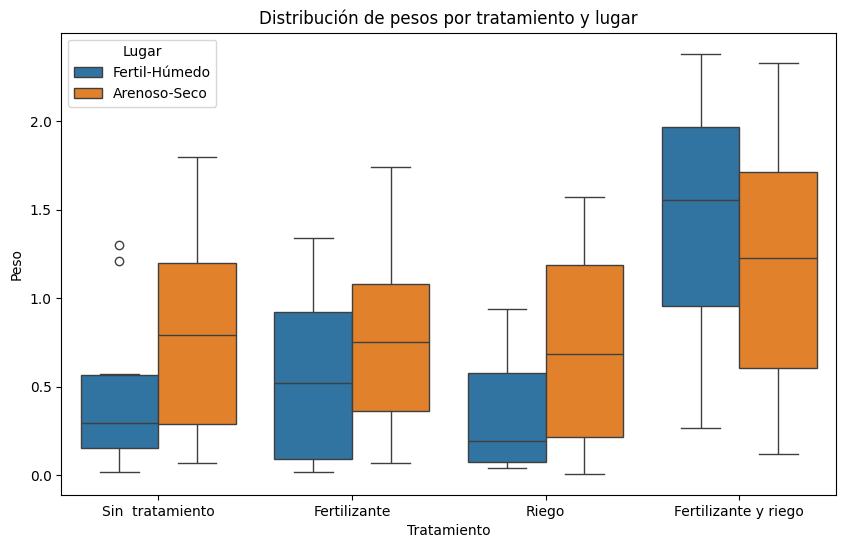

In [78]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tratamiento', y='Peso', hue='Lugar', data=df_long)
plt.title('Distribución de pesos por tratamiento y lugar')
plt.show()

                     sum_sq    df          F    PR(>F)
C(Años)            3.456961   1.0  11.818499  0.000972
C(Lugar)           0.596851   1.0   2.040487  0.157425
C(Tratamiento)     8.025874   3.0   9.146162  0.000033
C(Años):C(Lugar)   0.001201   1.0   0.004107  0.949078
Residual          21.352811  73.0        NaN       NaN


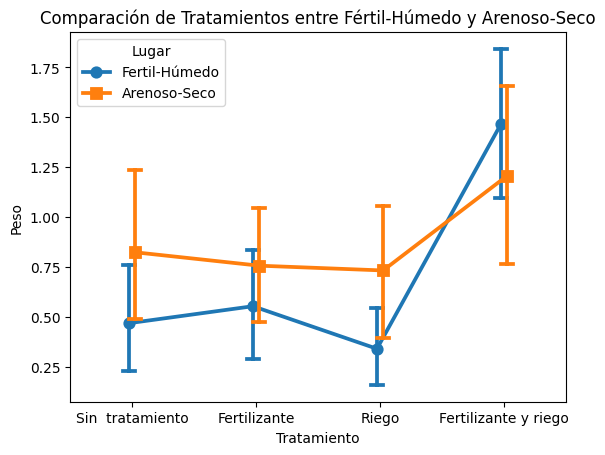

In [77]:

# Modelo ANOVA con dos factores (Años y Lugar)
modelo = ols('Peso ~ C(Años) + C(Lugar) + C(Tratamiento) + C(Años):C(Lugar)', data=df_long).fit()
anova_tabla = sm.stats.anova_lm(modelo, typ=2)
print(anova_tabla)

# Visualizar resultados
sns.pointplot(x='Tratamiento', y='Peso', hue='Lugar', data=df_long, dodge=True, markers=['o', 's'], capsize=.1)
plt.title('Comparación de Tratamientos entre Fértil-Húmedo y Arenoso-Seco')
plt.show()

+ El análisis que hemos realizado es de tres factores. Los tres factores considerados son:
    + Años (factor 1): Tiene dos niveles (1 y 2).
    + Lugar (factor 2): Tiene dos niveles (Fértil-Húmedo y Arenoso-Seco).
    + Tratamiento (factor 3): Tiene cuatro niveles (Sin tratamiento, Fertilizante, Riego, Fertilizante y riego).

+ En el modelo ANOVA utilizado:
    + C(Años) representa el efecto del factor Años.
    + C(Lugar) representa el efecto del factor Lugar.
    + C(Tratamiento) representa el efecto del Tratamiento.
    + C(Años):(Lugar) representa la interacción entre los factores Años y Lugar.

+ Por tanto, estamos analizando cómo afectan estos tres factores, individualmente y en interacción, al peso de los álamos.

**Interpretación de los Resultados**
+ En la tabla ANOVA, cada fuente de variación (Años, Lugar, Tratamiento, y la interacción entre Años y Lugar) tiene un valor F y un valor p asociado.
    + Valor F: Un valor F elevado indica una mayor variación explicada por el factor en comparación con la variación no explicada (residual).
    + Valor p: Nos indica si las diferencias son estadísticamente significativas. Un valor p menor a 0.05 generalmente indica que hay diferencias significativas.

+ Años (p=0.000972): El efecto del factor "Años" es estadísticamente significativo, lo que sugiere que los álamos crecen de manera diferente entre los años 1 y 2.
+ Lugar (p=0.157425): El lugar NO tiene un efecto significativo, lo que indica que los álamos crecen de manera similar en los suelos "Fértil-Húmedo" y "Arenoso-Seco".
+ Tratamiento (p=0.000033): Los diferentes tratamientos (sin tratamiento, fertilizante, riego, y fertilizante y riego) SI muestran una diferencia significativa en el crecimiento de los álamos.
+ Interacción Años (p=0.949078): La interacción entre Años y Lugar NO es significativa, lo que indica que el efecto de los años es similar en ambos suelos.

________________________________________________________________________________________________________________